In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(tf.__version__)

2.11.0


In [3]:
(x_train_images,y_train_label),(x_test_image,y_test_label) = datasets.cifar10.load_data()

In [4]:
#dataset has 50000 sample .each image is size of 32*32 and 3 for rgb format
x_train_images.shape

(50000, 32, 32, 3)

In [5]:
#test dataset has 10000 sample
x_test_image.shape

(10000, 32, 32, 3)

In [6]:
y_train_label.shape

(50000, 1)

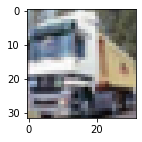

In [7]:
#to show the image
plt.figure(figsize=(15,2))
plt.imshow(x_train_images[1])

In [8]:
y_train_label[:5]
y_train_label.ndim

2

In [9]:
x_train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
#normalize the vlaue
x_train_image = x_train_images/255
x_test_image = x_test_image/255

In [11]:
x_train_image[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [12]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
print(y_train_label[0])
print(y_train_label[0][0])

[6]
6


In [14]:
#for label
class_names[y_train_label[0][0]]

'frog'

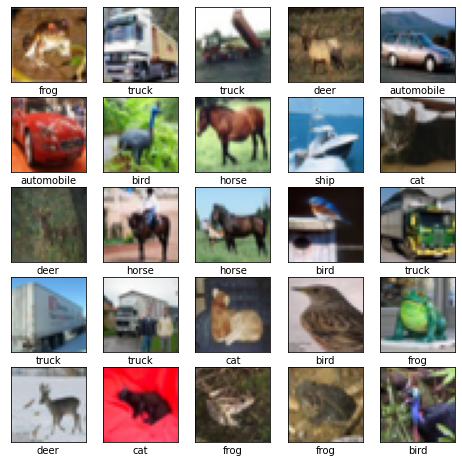

In [15]:
#for show the image#first 25 image
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_image[i])
    plt.xlabel(class_names[y_train_label[i][0]])
plt.show()

In [16]:
#create cnn 
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [18]:
#connect nural network
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))#hideen layer
model.add(layers.Dense(10))#output layer

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [23]:
#compile and train model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(x_train_image,y_train_label,epochs=10,validation_data=(x_test_image,y_test_label))

Epoch 1/10
1563/1563 [==============================] - 73s 45ms/step - loss: 1.5329 - accuracy: 0.4407 - val_loss: 1.2984 - val_accuracy: 0.5320
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1687 - accuracy: 0.5854 - val_loss: 1.1030 - val_accuracy: 0.6026
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0206 - accuracy: 0.6393 - val_loss: 0.9758 - val_accuracy: 0.6565
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9176 - accuracy: 0.6773 - val_loss: 0.9246 - val_accuracy: 0.6764
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8403 - accuracy: 0.7054 - val_loss: 0.9566 - val_accuracy: 0.6693
Epoch 6/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7785 - accuracy: 0.7280 - val_loss: 0.8914 - val_accuracy: 0.6923
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7307 - accuracy: 0.7425 - val_loss: 0.9126 -

In [25]:
#evalute the model
model.evaluate(x_test_image,y_test_label)

313/313 [==============================] - 4s 12ms/step - loss: 0.8915 - accuracy: 0.7076


[0.8915004730224609, 0.7075999975204468]

In [26]:
y_pred = model.predict(x_test_image)

313/313 [==============================] - 4s 12ms/step


In [27]:
y_pred

array([[ -3.2306755 ,  -4.1117277 ,  -2.3397496 , ...,  -2.1502357 ,
         -1.4993336 ,  -3.1742926 ],
       [  5.5950875 ,   4.8856063 ,  -5.2477202 , ...,  -6.393348  ,
          8.403242  ,   3.221935  ],
       [  1.7905656 ,   1.9172403 ,  -2.3438768 , ...,  -2.8203342 ,
          4.045007  ,   3.0368054 ],
       ...,
       [ -3.7250144 , -10.408764  ,   2.2047455 , ...,   1.6297568 ,
         -9.038694  ,  -6.210966  ],
       [  1.7645158 ,   1.6666503 ,  -2.1108308 , ...,  -0.19217095,
         -6.3172545 ,  -2.501598  ],
       [ -1.5216492 ,  -4.3971786 ,   0.22236638, ...,  10.718096  ,
         -4.553098  ,  -3.8968143 ]], dtype=float32)

In [33]:
y_class = [np.argmax(element) for  element in y_pred]

In [46]:
y_class[0:10]

[3, 8, 8, 0, 6, 6, 9, 6, 3, 1]

In [47]:
y_test_label[0:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [44]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_class,y_test_label)

0.7076

In [45]:
print(classification_report(y_class,y_test_label))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       999
           1       0.80      0.85      0.82       935
           2       0.64      0.58      0.61      1097
           3       0.42      0.61      0.50       689
           4       0.60      0.69      0.64       861
           5       0.71      0.56      0.62      1274
           6       0.84      0.73      0.78      1153
           7       0.75      0.74      0.75      1009
           8       0.77      0.86      0.81       901
           9       0.82      0.76      0.79      1082

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

